# Dark Social Classifier

***

## Overview

The main objective of this project is to build an effective __"deep neural network"__ that is capable of __classifying "dark social"__ web-traffic. First coined in 2012 by __Alexis Madrigal__, a journalist from __"The Atlantic,"__ the term is mostly used by marketers and business professionals to describe __website referral that is barely trackable__. The significant value of this issue is emphasized by one [study](https://radiumone.com/wp-content/uploads/2016/08/radiumone-the-dark-side-of-mobile-sharing-June-7-2016.pdf), which says that approximately __84% of website traffic in the world come through "dark social"__. On this, one of the most common form of dark social is __shared URL that is spreaded through email and instant messaging__. The afore-mentioned activity will be counted as "direct traffic" in most analytics programs nowadays, which provides deluted information and data for web-analyst.

The following machine learning algorithm, utilizes the means of __"natural language processing"__ and further feed the processed data into a "deep neural network" in  order to teach a machine on how to identify "dark social" traffic by __analyzing URL composition__ that has been given to it. Due to the limitation of data available, the following algorithm is specifically designed to catch the most obvious "dark social" based on its URL formation, and leave out the ambigious URL as "direct traffic". Furthermore, from the result of its collection of data, this algorithm will be __mostly effective to be applied for e-commerce website__. 

One from very few numbers of ways being suggested in order for someone to track "dark social" heavily lies on analyzing one's URL composition. The examples of this can been seen below :

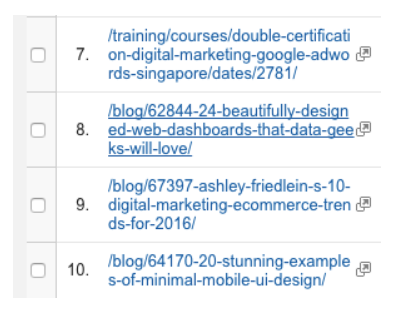

While the above URLs' are registered as "direct traffic," it seems unlikely for an internet user to exactly or even closely type words that will evenly match the 'search term' for those URLs to be displayed, and click it right away from their browzer search result. This algorithm is eager to put this recommended approach in combination with machine learning algorithm through "natural language processing" and "deep neural network".

### Data Used

* `dark_social_dataset.csv` : Collection of website pages's URL from numbers of popular E-Commerce websites like Amazon, Alibaba, Lazada, Zalora, Groupon and Shopee. Completely furnished with its dark social classification, the data reinforces a supervised machine learning algorithm.

## The Algorithm

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset
dataset = pd.read_csv('dark_social_dataset.csv')

As what has been presented within this dataset, it is very intuitive to understand that __the URL composition of each different E-Commerce websites are all unique and distinctive compared to each other__. It is easily noticable that one set of URL characteristic can be more complicated than the other, while vice versa, the other set can seems far more simple. Below are some of the examples for that issue in display :

In [3]:
# URL from 'www.alibaba.com'
print(dataset['Landing Page'][0])
print(dataset['Landing Page'][1])
print(dataset['Landing Page'][5])

https://www.alibaba.com/?spm=a2700.8556172.scGlobalHeader.25.13ca4b64ZheOfk
https://www.alibaba.com/product-detail/high-quality-motor-engine-fuel-filter_62208603118.html?spm=a271j.12369701.jxn6n6qe.33.38db7035l73bDg
https://www.alibaba.com/Vehicles-Accessories_p34?spm=a2700.8293689.201703.2.293b65aapDiFBf


In [4]:
# URL from 'www.lazada.co.id'
print(dataset['Landing Page'][52])
print(dataset['Landing Page'][55])

https://www.lazada.co.id/#hp-collections
https://www.lazada.co.id/products/adidas-running-womens-tee-own-the-run-dq2616-i428250052-s494821103.html?spm=a2o4j.seller.list.1.28f958aevIYuWD&mp=1


In [5]:
# URL from 'shopee.co.id'
print(dataset['Landing Page'][148])
print(dataset['Landing Page'][149])
print(dataset['Landing Page'][169])

https://shopee.co.id/
https://shopee.co.id/Komputer-Aksesoris-cat.134
https://shopee.co.id/flash_sale?fromItem=2391690157&promotionId=2000022699


In [6]:
# URL from 'www.zalora.co.id'
print(dataset['Landing Page'][308])
print(dataset['Landing Page'][309])
print(dataset['Landing Page'][316])

https://www.zalora.co.id
https://www.zalora.co.id/women/semua-produk/?price=99000-188000&csa=cwthirtytwoallunderoneeighteight&csa=homepagebottombanner
https://www.zalora.co.id/kelebihan-belanja-online/#fashionBrands


In [7]:
# URL from 'www.amazon.com'
print(dataset['Landing Page'][447])
print(dataset['Landing Page'][448])
print(dataset['Landing Page'][454])

https://www.amazon.com/
https://www.amazon.com/gp/customer-preferences/select-language/ref=aistrust4?preferencesReturnUrl=%2F&pf_rd_p=e47efa23-a7ad-4b96-b64e-347df45f6cdc&pf_rd_r=G85VTMY3TX9KRJYMR380
https://www.amazon.com/gp/help/customer/display.html/ref=aisttrust3?ie=UTF8&nodeId=201074230&pf_rd_p=e47efa23-a7ad-4b96-b64e-347df45f6cdc&pf_rd_r=G85VTMY3TX9KRJYMR380


In [8]:
# URL from "www.groupon.com"
print(dataset['Landing Page'][852])
print(dataset['Landing Page'][853])
print(dataset['Landing Page'][933])

https://www.groupon.com/
https://www.groupon.com/press/about-groupon
https://www.groupon.com/deals/gg-personalized-childrens-name-labels-89


## Preprocessing

The next crucial  step is 'preprocessing.' Due to the complexity of the dataset, this algorithm took a rather __detailed and specific approach of cleaning up the URL's text__. The following code is built in attempt to provide not only a clean text, however also learnable data for the "deep neural network" that is applied by the end of this algorithm. 

In general, the preprocessing stage will include the following operations :

1. Remove irrelevant parts within a given URL using `urllib.parse` and `regex`.
2. Tokenize the whole URL into bits of words using NLTK tokenizer.
3. Reduces different but morphologically related words into its same base/root form through NLTK stemmer.

In [3]:
# Create function to clean URL text
import re
from urllib.parse import urlparse

def strip_url(text):
    url = urlparse(text)
    url = url._replace(scheme = '', query = '')
    return url.geturl()

def remove_irrelevance(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'html|ref|www|com|(\b)[a-z](\b)|(\b)[0-9](\b)|(\b)[a-z][a-z](\b)|\b([a-z][0-9]{9})\b|\b([0-9]{7})\b|\b([0-9]{8})\b', '', text)
    return text

def denoise_text(text):
    text = strip_url(text)
    text = remove_irrelevance(text)
    return text

The actually body of a URL basically can be devided into numbers of categorical parts. The following code will put that in display : 

In [10]:
url_example1 = urlparse(dataset['Landing Page'][456])
url_example2 = urlparse(dataset['Landing Page'][235])
print('url_example1 =', url_example1)
print('url_example2 =', url_example2)

url_example1 = ParseResult(scheme='https', netloc='www.amazon.com', path='/dp/B0794W1SKP', params='', query='_encoding=UTF8&ref_=sd_allcat_k_ods_ha_lr', fragment='')
url_example2 = ParseResult(scheme='https', netloc='shopee.co.id', path='/m/super-brand-day', params='', query='smtt=208.36297', fragment='')


As what the output has shown, URL overall is constituted of "scheme," "netlof," "path," "params," "query," and "fragment". Taking reference on the example above, only "netlof" and "path" contain text that are valuable to be analyzed.

In [4]:
# Cleaning the text
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] 
for i in range (0, 999): # Modify this according to data size 
    review = denoise_text(dataset['Landing Page'][i])
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Walmond\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Creating the bag of words model, training set, and test set

The method being chosen for this algorithm in order to build its bag of words model is `TfidfVectorizer`, instead of  `CountVectorizer`. On the opposite side of `CountVectorizer` which rate highly on constantly appearing words, `TfidfVectorizer` do the contrast by giving unique and rare words with higher score. The reason why this mechanism is prefered than the other, is due to the one recommended approach on how to notice 'dark social' based on it URL composition, and the general nature of websites' URL itself. As what has been explained early on, on how to identify "dark social" based on a given URL, most "dark social" comprises of extensive, complex, and singular characteristic within its URL. Acknowledging this, `TfidfVectorizer` is the most obvious selection for this algorithm.

In [5]:
# Creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [6]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Building the deep neural network

In [7]:
# Part 2 - Create the DNN
from keras.models import Sequential
from keras.layers import Dense

# Initializing the DNN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 1161, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2321))

# Adding Second hidden layer
classifier.add(Dense(units = 1161, kernel_initializer = 'uniform', activation = 'relu'))

# Adding third hidden layer
classifier.add(Dense(units = 1161, kernel_initializer = 'uniform', activation = 'relu'))

# Adding output layer
# For multiple dependent v. the needed activation function is softmax
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the DNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


## Fitting the DNN to the training set

In [11]:
#Fitting the DNN to the training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
799/799 [==============================] - 6s 8ms/step - loss: 0.4141 - acc: 0.8085
Epoch 2/100
799/799 [==============================] - 6s 8ms/step - loss: 0.0548 - acc: 0.9825
Epoch 3/100
799/799 [==============================] - 6s 7ms/step - loss: 0.0164 - acc: 0.9937
Epoch 4/100
799/799 [==============================] - 6s 7ms/step - loss: 0.0086 - acc: 0.9975
Epoch 5/100
799/799 [==============================] - 6s 7ms/step - loss: 0.0121 - acc: 0.9950
Epoch 6/100
799/799 [==============================] - 6s 7ms/step - loss: 0.0042 - acc: 0.9975
Epoch 7/100
799/799 [==============================] - 6s 7ms/step - loss: 0.0033 - acc: 0.9987
Epoch 8/100
799/799 [==============================] - 6s 7ms/step - loss: 0.0028 - acc: 0.9975
Epoch 9/100
799/799 [==============================] - 6s 7ms/step - loss: 0.0022 - acc: 0.9987
Epoch 10/100
799/799 [==============================] - 6s 7ms/step - loss: 0.0019 - acc

## Result with test result

In [14]:
# Predicting the Test result
Y_Pred = classifier.predict(X_test)
Y_Pred = (Y_Pred > 0.5)

In [21]:
# Making Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_Pred)
print(cm)

[[ 45   5]
 [ 27 123]]
